In [269]:
%matplotlib inline

In [270]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
#import additional libraries here if you need them

import seaborn as sns
from seaborn import plt

from sklearn import metrics


Kaggle has conveniently split the data already into a training set and test set. You can find them in the data folder.

In [271]:
#load data here
#eg from regression lab : 
#x = pd.read_table('http://www.ats.ucla.edu/stat/examples/chp/p054.txt')

df_train = pd.read_csv( 'train.csv')
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S


In [272]:
df_test = pd.read_csv( 'test.csv')
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


While you could analyze this data many different ways, we'll focus on using logistic regression. For a recap of what logistic regression is look [here]('http://blog.yhathq.com/posts/logistic-regression-and-python.html').

Before creating your model, conduct some exploratory data analysis first. Make a few plots and comment on the results. What interesting patterns do you see?

In [273]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


#Viz Survied by Categories

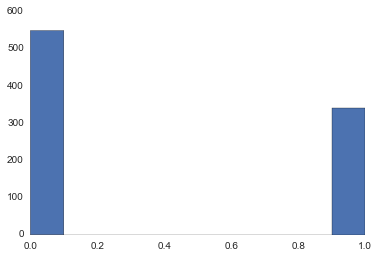

In [274]:
#Code for plot goes here
df_train['Survived'].hist()
#plt.hist(df_train['Survived'])

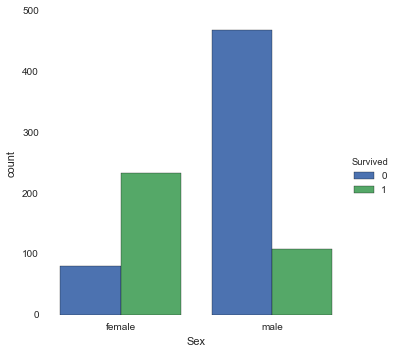

In [275]:
sns.factorplot("Sex", data=df_train, hue="Survived")

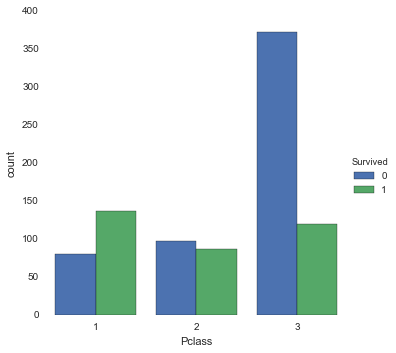

In [276]:
#plt.hist(df_train['Pclass'])
sns.factorplot("Pclass", data=df_train, hue="Survived")

In [277]:
survived_by_class = df_train.groupby("Pclass").Survived.agg(['sum','count'])
survived_by_class['survival_rate'] = survived_by_class['sum'] / survived_by_class['count']
survived_by_class

,sum,count,survival_rate
Pclass,,,
1,136,216,0.629630
2,87,184,0.472826
3,119,491,0.242363


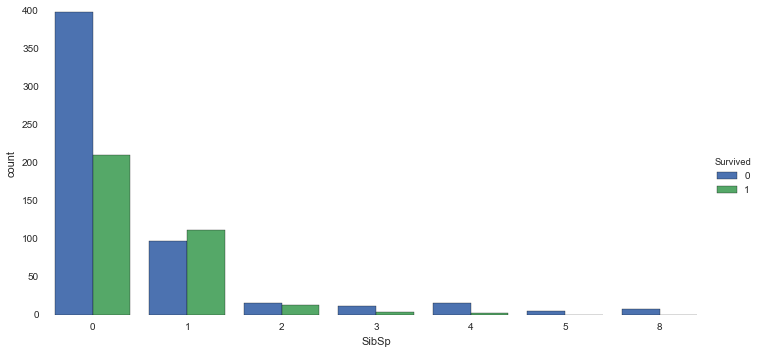

In [278]:
sns.factorplot("SibSp", data=df_train, hue="Survived", aspect=2)

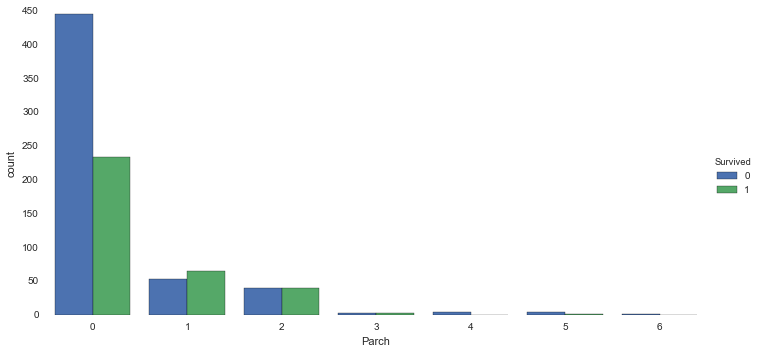

In [279]:
sns.factorplot("Parch", data=df_train, hue="Survived", aspect=2)

#Viz Sex

In [280]:
'''
#view gender, via proportion survived - http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb
#fig = plt.figure(figsize=(18,6))
fig = plt.figure(figsize=(12,4))

df_train.Survived[df_train.Sex == 'male'].value_counts()
/float(df_train.Sex[df_train.Sex == 'male'].size).plot(kind='barh',label='Male')

df_train.Survived[df_train.Sex == 'female'].value_counts().plot(kind='barh',label='Female',color='#FA2379') 

plt.title("Survial by Gender (Proportional to Gender Pop)")
plt.legend(loc='best')
'''

'\n#view gender, via proportion survived - http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb\n#fig = plt.figure(figsize=(18,6))\nfig = plt.figure(figsize=(12,4))\n\ndf_train.Survived[df_train.Sex == \'male\'].value_counts()\n/float(df_train.Sex[df_train.Sex == \'male\'].size).plot(kind=\'barh\',label=\'Male\')\n\ndf_train.Survived[df_train.Sex == \'female\'].value_counts().plot(kind=\'barh\',label=\'Female\',color=\'#FA2379\') \n\nplt.title("Survial by Gender (Proportional to Gender Pop)")\nplt.legend(loc=\'best\')\n'

In [281]:
#survived_by_sex = df_train.groupby("Pclass").Survived.agg(['sum','count'])
survived_by_sex = df_train.groupby("Sex").Survived.agg(['sum','count'])
survived_by_sex['survival_rate'] = survived_by_sex['sum'] / survived_by_sex['count']
survived_by_sex

,sum,count,survival_rate
Sex,,,
female,233,314,0.742038
male,109,577,0.188908


#Viz Embarked

In [282]:
#Add town name to make variable clear
df_train["embarked_town"] = df_train.Embarked.map({"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"})
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Southampton


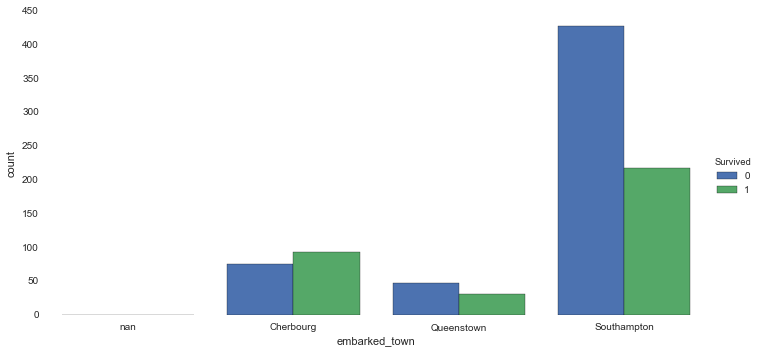

In [283]:
sns.factorplot("embarked_town", data=df_train, hue="Survived", aspect=2)
#embarked is port where boarded, likely correlated with Pclass?

In [284]:
#survived_by_sex = df_train.groupby("Pclass").Survived.agg(['sum','count'])
survived_by_embarked = df_train.groupby("embarked_town").Survived.agg(['sum','count'])
survived_by_embarked['survival_rate'] = survived_by_embarked['sum'] / survived_by_embarked['count']
survived_by_embarked

,sum,count,survival_rate
embarked_town,,,
Cherbourg,93,168,0.553571
Queenstown,30,77,0.389610
Southampton,217,644,0.336957


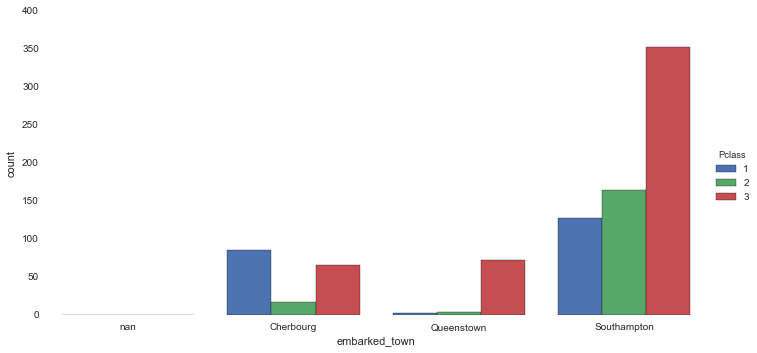

In [285]:
sns.factorplot("embarked_town", data=df_train, hue="Pclass", aspect=2)

In [286]:
#how many nan?
#print df_train['embarked_town'].info

In [287]:
#looks fairly correlated w/ Pclass... likely should not incude this in the model

#Viz Age

In [288]:
#explore null values

#list all
df_train.Age.isnull()

#list if null
df_train[df_train.Age.isnull()]

#shows how many other cols have data when Age is null -- not quite what we are looking for..
df_train[df_train.Age.isnull()].count()

#how to get count of just null values for age?

PassengerId      177
Survived         177
Pclass           177
Name             177
Sex              177
Age                0
SibSp            177
Parch            177
Ticket           177
Fare             177
Cabin             19
Embarked         177
embarked_town    177
dtype: int64

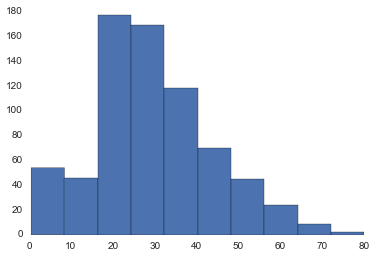

In [289]:
#plt.hist(df_train['Age'])
df_train.Age.hist()

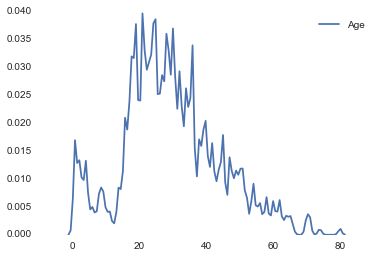

In [290]:
df_train['Age'].head()
#plt.hist(df_train['Age'])

sns.kdeplot(df_train['Age'], bw=0.5)
#sns.rugplot(df_train['Age'])

#sns.FacetGrid?

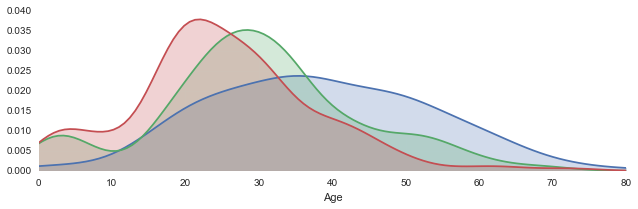

In [291]:
#function to see age distribution per Pclass
fg = sns.FacetGrid(df_train, hue="Pclass", aspect=3)
fg.map(sns.kdeplot, "Age", shade=True)
fg.set(xlim=(0,80))

#how to add legend w/ PClass groups

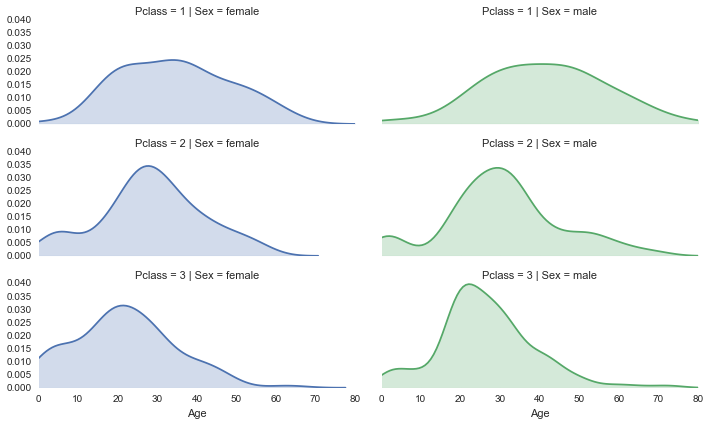

In [292]:
#Age in greater depth
fg = sns.FacetGrid(df_train, col="Sex", row="Pclass", hue="Sex", size=2, aspect=2.5)
fg.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True)
fg.set(xlim=(0,80))


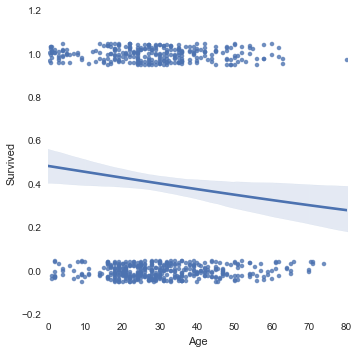

In [293]:
sns.lmplot("Age","Survived", df_train, logistic=True, y_jitter=0.05).set(xlim=(0,80))
#Age alone is not a good indicator

#sns.lmplot?

In [294]:
#mean values for age
print 'Mean Age:' , df_train.Age.mean()
print 'StDev Age: ' , df_train.Age.std()

#see age pivot table below for alternative inputs

Mean Age: 29.6991176471
StDev Age:  14.5264973323


In [295]:

mean_age = df_train.Age.mean()
stdev_age = df_train.Age.std()

#set random seed pre-function.. this works!
np.random.seed(100)

#create funciton w/ normal distrbution for age to draw from
def get_age_impute_values(n): 
    return np.random.normal( mean_age , stdev_age , n,  ) 

#np.random.normal?
#np.random?

'''
#NOTE: some ppl are getting an age VERY low ~4yo for married man...
Alternatives: 
  (A) take mean from group (eg Sex | Pclass)
  (B) Triangle distribution
''' 

'\n#NOTE: some ppl are getting an age VERY low ~4yo for married man...\nAlternatives: \n  (A) take mean from group (eg Sex | Pclass)\n  (B) Triangle distribution\n'

In [296]:
#create mask for missing entries
age_missing_mask = df_train.Age.isnull()

#outputs all values & total count of rows
age_missing_mask      # ==> 177 total rows

#we have 177 rows that have missing Age field
df_train[age_missing_mask].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Queenstown
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Southampton
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Cherbourg
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Cherbourg
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Queenstown


In [297]:
#see df w/ some Age entries = null
df_train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Southampton
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Queenstown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,Southampton
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,Southampton
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,Southampton
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C,Cherbourg


In [298]:
#replace null values with numbers from distribution
df_train.loc[df_train.Age.isnull(), 'Age'] = get_age_impute_values(n=177)

#confirm that #6 is not assigned a number
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Southampton
5,6,0,3,"Moran, Mr. James",male,4.281154,0,0,330877,8.4583,NaN,Q,Queenstown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,Southampton
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S,Southampton
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S,Southampton
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C,Cherbourg


In [299]:
#confirm via info()
df_train.info()
#NOTE all 'Age' is complete now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Ticket           891 non-null object
Fare             891 non-null float64
Cabin            204 non-null object
Embarked         889 non-null object
embarked_town    889 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 97.5+ KB


In [300]:

# #pivot table to find mean age for Sex | Pclass
# df_train.pivot_table(df_train, values=["Age"], 
#                      index=df_train["Pclass"], columns=["Sex"], 
#                      aggfunc=np.mean)

# #df_train.pivot_table?


### QUESTION: 
##### my pivot table function (to get mean age=f( sex, class) does not work, why?


In [301]:
#TRY from: http://nbviewer.ipython.org/github/ga-students/DAT_SF_11/blob/master/labs/lab_02/intro_pandas_titanic.ipynb
#table to view signifiance of age... this time w/o null values (would not input)
df_train.groupby(['Pclass','Sex'])['Age'].agg('mean')

Pclass  Sex   
1       female    33.333572
        male      39.342020
2       female    28.534489
        male      30.726833
3       female    23.107990
        male      27.045193
Name: Age, dtype: float64

### Answer
#### Otto solution below:

In [302]:
#gives a df
pd.DataFrame(df_train.groupby(['Pclass','Sex'])['Age'].agg('mean'))

Age
Pclass Sex              
1      female  33.333572
       male    39.342020
2      female  28.534489
       male    30.726833
3      female  23.107990
       male    27.045193

In [303]:
#gives an array
df_train.groupby(['Pclass','Sex'])['Age'].agg('mean').values

array([ 33.33357194,  39.34201994,  28.53448857,  30.72683319,
        23.10798974,  27.04519345])

In [ ]:
#explore techniques to access multi-level data

### QUESTION (UNRESOLVED))
##### how to make a stacked histogram (or area chart) where... 
##### Y-axis = count of survived
##### X-axis = age
##### values = count survived, count not survived (thus there would be 2 sets of values in the plot stacked on top of each other

In [304]:
df_age_stack_survived = df_train.groupby('Survived')


(array([  85.,  131.,  265.,  204.,  117.,   60.,   20.,    6.,    1.,    0.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

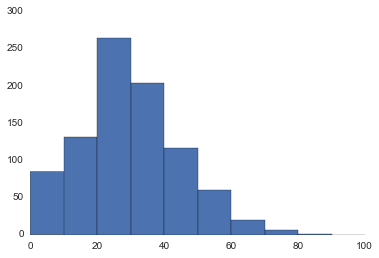

In [305]:
plt.hist(df_train['Age'], bins=10,range=(0,100), stacked=True)

# Viz Cabin & Deck

In [306]:
#redefine cabine
df_train["Deck"] = df_train.Cabin.str[0].map(lambda s: np.nan if s == "T" else s)

df_train.head(4)
#df_train = df_train.drop(["name", "ticket", "cabin"], axis=1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Southampton,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Cherbourg,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Southampton,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Southampton,C


In [307]:
'''
#doesn't work... perhaps due to NaNs?
survived_by_deck = df_train.groupby("Deck").Survived.agg(['sum','count'])
survived_by_deck['survival_rate'] = survived_by_deck['sum'] / survived_by_deck['count']
survived_by_deck
'''

'\n#doesn\'t work... perhaps due to NaNs?\nsurvived_by_deck = df_train.groupby("Deck").Survived.agg([\'sum\',\'count\'])\nsurvived_by_deck[\'survival_rate\'] = survived_by_deck[\'sum\'] / survived_by_deck[\'count\']\nsurvived_by_deck\n'

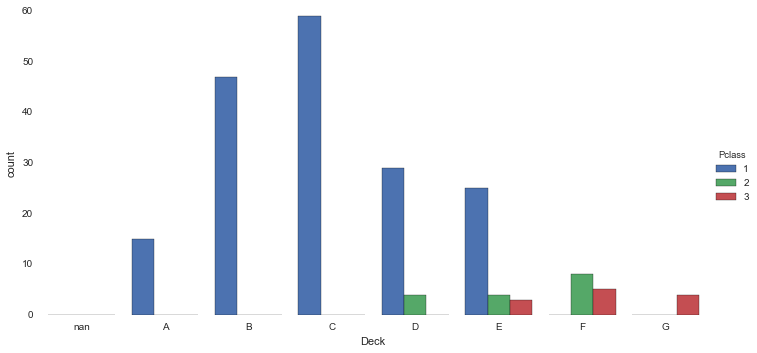

In [308]:
sns.factorplot("Deck", data=df_train, hue="Pclass", aspect=2)


In [309]:
#very correlated with Pclass
#Total count is quite low, and very low for Class 2 and Class 3...
# ==> perhaps there is another non-Deck class we are missing?

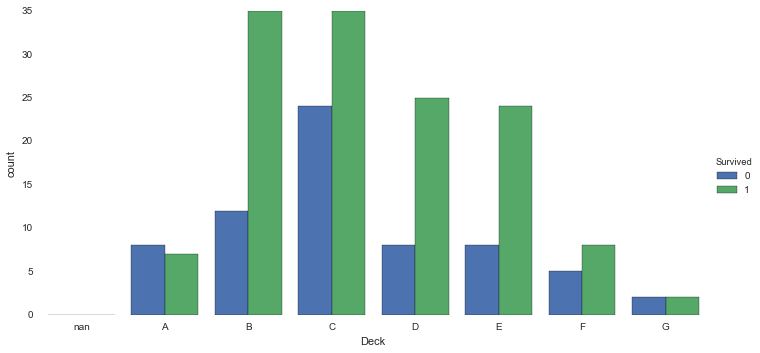

In [310]:
sns.factorplot("Deck", data=df_train, hue="Survived", aspect=2)


In [311]:
#Deck in greater depth

'''Does not work
fg = sns.FacetGrid(df_train, col="Sex", row="Pclass", hue="Survived", size=2, aspect=2.5)
fg.map(sns.factorplot, "Deck", data=df_train, hue="Survived")
#sns.despine(left=True)
'''

'Does not work\nfg = sns.FacetGrid(df_train, col="Sex", row="Pclass", hue="Survived", size=2, aspect=2.5)\nfg.map(sns.factorplot, "Deck", data=df_train, hue="Survived")\n#sns.despine(left=True)\n'

#Fare

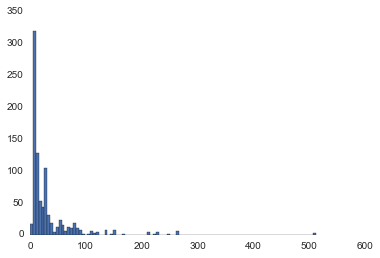

In [312]:
df_train['Fare'].hist(bins=100)

#df_train['Fare'].hist?

(array([ 732.,  106.,   31.,    2.,   11.,    6.,    0.,    0.,    0.,    3.]),
 array([   0.     ,   51.23292,  102.46584,  153.69876,  204.93168,
         256.1646 ,  307.39752,  358.63044,  409.86336,  461.09628,
         512.3292 ]),
 <a list of 10 Patch objects>)

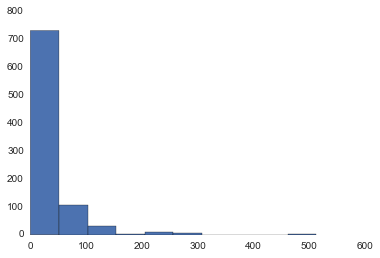

In [313]:
plt.hist( df_train['Fare'])

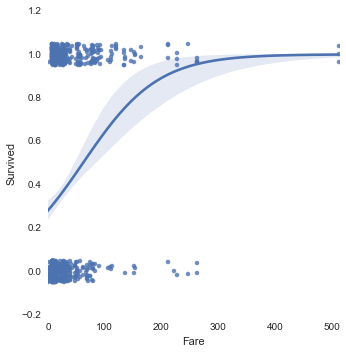

In [314]:
sns.lmplot("Fare" , "Survived" , df_train, logistic=True, y_jitter=0.05).set(
    xlim=(0,max(df_train["Fare"])))


In [315]:
#df_train["fare_scale"] = np.scale( df_train['Fare'])
from sklearn.preprocessing import scale

df_train["fare_scale"] = scale( df_train['Fare'])
df_train["fare_log"] = np.log(df_train['Fare'])

In [316]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town,Deck,fare_scale,fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Southampton,NaN,-0.502445,1.981001
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Cherbourg,C,0.786845,4.266662


In [317]:
df_train.describe().T
#cannot look at log values b/c some passengers for Fare are set to $0

,count,mean,std,min,25%,50%,75%,max
PassengerId,891,4.460000e+02,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,891,2.932933e+01,14.614004,-13.492742,20.000000,28.000000,38.368620,80.000000
SibSp,891,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891,3.220421e+01,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
fare_scale,891,3.987333e-18,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167
fare_log,891,-inf,NaN,-inf,2.068177,2.670985,3.433987,6.238967


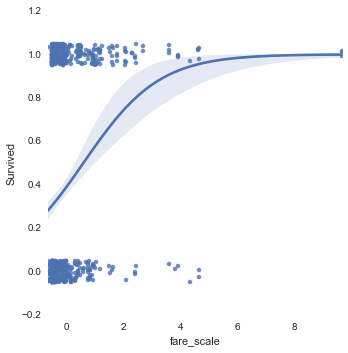

In [318]:
sns.lmplot("fare_scale" , "Survived" , df_train, logistic=True, y_jitter=0.05).set( 
    xlim=(min(df_train["fare_scale"]) ,max(df_train["fare_scale"])))

# Viz Summary Charts

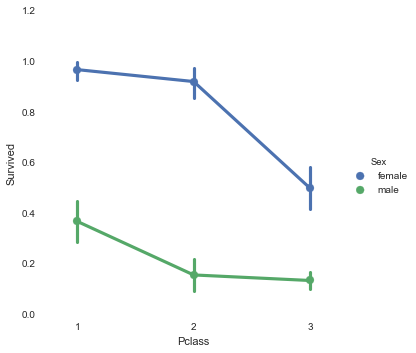

In [319]:
sns.factorplot("Pclass", "Survived", data=df_train, hue="Sex")

#Prepare Data for Model

useful cleaning link: 
http://nbviewer.ipython.org/github/jrgilbertson/titanic-predicting-disaster/blob/master/Titanic.ipynb

In [320]:
#df_train.corr()

In [321]:
df_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_town,Deck,fare_scale,fare_log
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S,Southampton,NaN,-0.502445,1.981001


In [322]:
#drop values not useful
df_train = df_train.drop(["Name", "Ticket", "Cabin", "Embarked","fare_log"], axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_town,Deck,fare_scale
0,1,0,3,male,22,1,0,7.2500,Southampton,NaN,-0.502445
1,2,1,1,female,38,1,0,71.2833,Cherbourg,C,0.786845
2,3,1,3,female,26,0,0,7.9250,Southampton,NaN,-0.488854
3,4,1,1,female,35,1,0,53.1000,Southampton,C,0.420730
4,5,0,3,male,35,0,0,8.0500,Southampton,NaN,-0.486337


In [323]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
embarked_town    889 non-null object
Deck             203 non-null object
fare_scale       891 non-null float64
dtypes: float64(3), int64(5), object(3)
memory usage: 83.5+ KB


In [324]:
#fill Deck2 with G
df_train['Deck2'] = df_train['Deck']
df_train['Deck2'] = df_train['Deck2'].fillna('G') #assuming passengers w/o Deck are MOSTLY Pclass 3


In [325]:
#dropping incomplete Deck1
df_train = df_train.drop(["Deck"], axis=1)
df_train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_town,fare_scale,Deck2
0,1,0,3,male,22,1,0,7.25,Southampton,-0.502445,G


In [326]:
print np.count_nonzero(np.isnan(df_train['Age']))

0


In [327]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId      891 non-null int64
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
embarked_town    889 non-null object
fare_scale       891 non-null float64
Deck2            891 non-null object
dtypes: float64(3), int64(5), object(3)
memory usage: 83.5+ KB


In [328]:
#dataset is complete, now to create dummy vars

###Data Cleansing - Dummy Vars
Deck

In [329]:
Deck_dummies = pd.get_dummies(df_train['Deck2'])
Deck_dummies.head(5)

,A,B,C,D,E,F,G
0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1


In [330]:
Deck_dummies.drop(['G'], axis=1, inplace=True)
Deck_dummies.head(1)

,A,B,C,D,E,F
0,0,0,0,0,0,0


In [331]:
df_train = df_train.join(Deck_dummies)
df_train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_town,fare_scale,Deck2,A,B,C,D,E,F
0,1,0,3,male,22,1,0,7.25,Southampton,-0.502445,G,0,0,0,0,0,0


###Data Cleansing - Dummy Vars
Sex

In [332]:
sex_dummies = pd.get_dummies(df_train['Sex'])
sex_dummies.head(1)

,female,male
0,0,1


In [334]:
sex_dummies.drop(['male'], axis=1, inplace=True)
sex_dummies.head(1)

,female
0,0


In [335]:
df_train = df_train.join(sex_dummies)
df_train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_town,fare_scale,Deck2,A,B,C,D,E,F,female
0,1,0,3,male,22,1,0,7.25,Southampton,-0.502445,G,0,0,0,0,0,0,0


###Data Cleansing - Dummy vars
Class

In [337]:
class_dummies = pd.get_dummies(df_train['Pclass'])
class_dummies.columns = ['C1' , 'C2' , 'C3'] #need to rename cols to str type
class_dummies.head(1)

,C1,C2,C3
0,0,0,1


In [338]:
#drop 3 as baseline 
class_dummies.drop(['C3'], axis=1, inplace=True)
class_dummies.head(1)

,C1,C2
0,0,0


In [339]:
df_train = df_train.join(class_dummies)
df_train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_town,fare_scale,Deck2,A,B,C,D,E,F,female,C1,C2
0,1,0,3,male,22,1,0,7.25,Southampton,-0.502445,G,0,0,0,0,0,0,0,0,0


### Embarked Town

In [340]:
embarked_dummies = pd.get_dummies(df_train['embarked_town'])
embarked_dummies.head(5)

,Cherbourg,Queenstown,Southampton
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [342]:
embarked_dummies.drop(['Southampton'], axis=1, inplace=True)
embarked_dummies.head(1)

,Cherbourg,Queenstown
0,0,0


In [343]:
df_train = df_train.join(embarked_dummies)
df_train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,embarked_town,fare_scale,...,B,C,D,E,F,female,C1,C2,Cherbourg,Queenstown
0,1,0,3,male,22,1,0,7.25,Southampton,-0.502445,...,0,0,0,0,0,0,0,0,0,0


#Model

Once you have explored the dataset, begin creating your model. You may want to do several iterations of this experimenting with different combinations of features. 

In [344]:
#Create your model here
x_cols = ['Age', 'female', 'C1', 'C2', 'A','B','C','D','E','F','Cherbourg','Queenstown' ] 
x_model_data = sm.tools.add_constant( df_train[x_cols])

x_model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
const         891 non-null int64
Age           891 non-null float64
female        891 non-null float64
C1            891 non-null float64
C2            891 non-null float64
A             891 non-null float64
B             891 non-null float64
C             891 non-null float64
D             891 non-null float64
E             891 non-null float64
F             891 non-null float64
Cherbourg     891 non-null float64
Queenstown    891 non-null float64
dtypes: float64(12), int64(1)
memory usage: 97.5 KB


In [345]:
x_model_data.head(1)

,const,Age,female,C1,C2,A,B,C,D,E,F,Cherbourg,Queenstown
0,1,22,0,0,0,0,0,0,0,0,0,0,0


In [346]:
y_data = df_train['Survived']
y_data.head(5)
#y_data.info() #this doesn't work

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [359]:
x_model_data.corr()

,const,Age,female,C1,C2,A,B,C,D,E,F,Cherbourg,Queenstown
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,NaN,1.000000,-0.093274,0.286522,0.017183,0.100863,0.080355,0.105032,0.115362,0.099342,-0.059660,0.028200,-0.054627
female,NaN,-0.093274,1.000000,0.098013,0.064746,-0.078271,0.109689,0.058649,0.079248,0.047003,0.008202,0.082853,0.074115
C1,NaN,0.286522,0.098013,1.000000,-0.288585,0.231323,0.417160,0.470749,0.291218,0.242675,-0.068833,0.296423,-0.155342
C2,NaN,0.017183,0.064746,-0.288585,1.000000,-0.066756,-0.120386,-0.135851,-0.041325,-0.038864,0.122906,-0.125416,-0.127301
A,NaN,0.100863,-0.078271,0.231323,-0.066756,1.000000,-0.030880,-0.034846,-0.025663,-0.025256,-0.015923,0.093040,-0.040246
B,NaN,0.080355,0.109689,0.417160,-0.120386,-0.030880,1.000000,-0.062841,-0.046280,-0.045547,-0.028715,0.168642,-0.072579
C,NaN,0.105032,0.058649,0.470749,-0.135851,-0.034846,-0.062841,1.000000,-0.052225,-0.051398,-0.032403,0.113952,-0.049776
D,NaN,0.115362,0.079248,0.291218,-0.041325,-0.025663,-0.046280,-0.052225,1.000000,-0.037852,-0.023864,0.102977,-0.060318
E,NaN,0.099342,0.047003,0.242675,-0.038864,-0.025256,-0.045547,-0.051398,-0.037852,1.000000,-0.023486,-0.015939,-0.037897


In [347]:
#split data for cross-validation test
from sklearn.cross_validation import train_test_split

In [348]:
X_train, X_test, y_train, y_test = train_test_split( 
    x_model_data, y_data, 
    test_size=0.2, random_state=1000)


#Model Logit (Broken)
##### This uses Stats Models (different syntax to scikit learn, ignoring these)

In [ ]:
#logit_mdl.predict(df_train[x_model_data])
#logit_mdl.predict(X_test)


In [ ]:
#logit_mdl.score( X_test, y_test)
#logit_mdl.score?

In [ ]:
#shifting to model from new nbviewer for testing...
#http://nbviewer.ipython.org/github/ga-students/DAT_SF_11/blob/master/labs/lab_02/intro_pandas_titanic.ipynb

#Model: LogisticRegression (Working)

In [349]:
from sklearn.linear_model import LogisticRegression

In [350]:
clf = LogisticRegression()

In [351]:
clf.fit( X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [352]:
clf.score( X_test, y_test)

0.7988826815642458

In [353]:
#examine coef in new df
clf_coef = pd.DataFrame(zip(x_model_data.columns, np.transpose(clf.coef_) )) 

In [354]:
clf_coef.rename(columns={0:'param',1: 'value'}, inplace=True)
clf_coef

,param,value
0,const,[-0.910490224125]
1,Age,[-0.0216347436348]
2,female,[2.47070306136]
3,C1,[1.48583498232]
4,C2,[1.08865264291]
5,A,[0.303244156425]
6,B,[0.639317224176]
7,C,[0.394176348302]
8,D,[0.889262415975]
9,E,[0.996535392332]


In [355]:
clf_coef['odds_ratio'] = clf_coef['value'].map(np.exp)
clf_coef

,param,value,odds_ratio
0,const,[-0.910490224125],[0.402326945308]
1,Age,[-0.0216347436348],[0.978597608786]
2,female,[2.47070306136],[11.8307616798]
3,C1,[1.48583498232],[4.41865337034]
4,C2,[1.08865264291],[2.9702693618]
5,A,[0.303244156425],[1.35424507172]
6,B,[0.639317224176],[1.89518644996]
7,C,[0.394176348302],[1.48316207873]
8,D,[0.889262415975],[2.43333420079]
9,E,[0.996535392332],[2.70888034402]


### Question: how to determine significance of params in equation?
http://scikit-learn.org/stable/modules/feature_selection.html
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
#???

##Interpretting results of Logit

In [361]:
#interpret clf LogisticRegression Model
from sklearn.metrics import confusion_matrix, classification_report

In [362]:
y_pred_clf = clf.predict( X_test)

In [363]:
confusion_matrix( y_test, y_pred_clf)

#http://en.wikipedia.org/wiki/Confusion_matrix
#rows - actual class
#cols - predicted class

array([[87, 13],
       [23, 56]])

[[87 13]
 [23 56]]


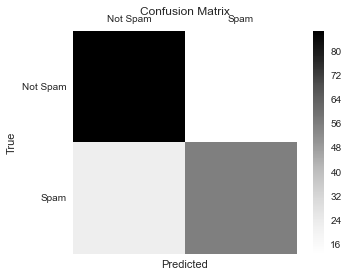

In [364]:
#add to confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

cm_labels = ['Not Spam','Spam']

cm = confusion_matrix( y_test, y_pred_clf )
print(cm)

#fmt
fg = plt.figure()
ax = fg.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix')
plt.grid(False)  #(color='white', linestyle='dashed')
fg.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
ax.set_xticklabels(['']+ cm_labels)
ax.set_yticklabels(['']+ cm_labels)
plt.show()

In [365]:
print classification_report(y_test, y_pred_clf)

#classification_report?

             precision    recall  f1-score   support

          0       0.79      0.87      0.83       100
          1       0.81      0.71      0.76        79

avg / total       0.80      0.80      0.80       179



In [366]:
#view predicted probabilities
y_pred_clf_df = pd.DataFrame(clf.predict_proba(X_test))

In [367]:
y_pred_clf_df.rename(columns={0:'No',1: 'Yes'}, inplace=True)
y_pred_clf_df['y_pred_clf'] = y_pred_clf
y_pred_clf_df['y_true'] = y_test
y_pred_clf_df.head(5)

,No,Yes,y_pred_clf,y_true
0,0.938753,0.061247,0,0
1,0.074620,0.925380,1,1
2,0.812739,0.187261,0,0
3,0.914485,0.085515,0,0
4,0.795717,0.204283,0,0


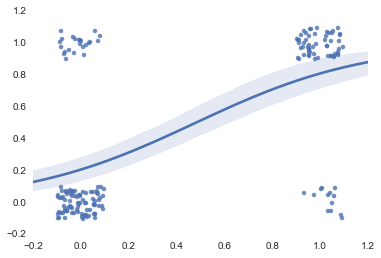

In [368]:
#map predicted value vs actual 
sns.regplot( y_pred_clf, y_test, x_jitter=0.1, y_jitter=0.1, logistic=True)

#sns.regplot?

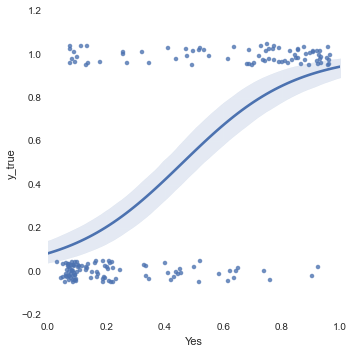

In [369]:
sns.lmplot("Yes","y_true", y_pred_clf_df, logistic=True, y_jitter=0.05).set(xlim=(0,1))
#Interpretation

[(-0.1, 1.1)]

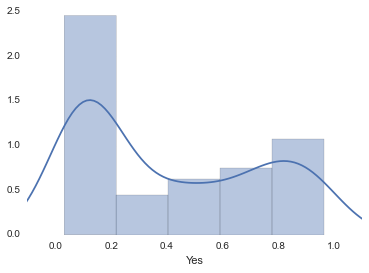

In [370]:
#map predicted likelihoold of survival
fg = sns.distplot(y_pred_clf_df['Yes'])
fg.set(xlim=(-0.1,1.1))

#Model 2: Logit (Broken) 
http://nbviewer.ipython.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb

#Model 3: Gradient Boosting Classifier

In [378]:
#lets try a random forrest on basically all the vairables!

X = df_train[x_cols]       #x_cols from above
Y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=1000)

In [379]:
from sklearn.ensemble import GradientBoostingClassifier
# fit estimator to training set
est = GradientBoostingClassifier(n_estimators=450, max_depth=1, learning_rate = 0.5, min_samples_leaf = 3)
est.fit(X_train, y_train)
#score on test
est.score(X_test, y_test)

0.82681564245810057

In [380]:
est.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [381]:
#maybe try a grid sear for better parameters?
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'learning_rate': [0.5, 0.1, 0.01],
              'max_depth': [1,3],
              'min_samples_leaf': [1,3],  
              'max_features': [1.0] 
              }

est = GradientBoostingClassifier(n_estimators=450)


In [377]:
# this may take some minutes
gs_cv = GridSearchCV(est, param_grid, n_jobs=2).fit(X_train, y_train)

### Model: Random Forest

In [385]:
#let's see if the random forrest does better!
from sklearn.ensemble import RandomForestClassifier
#fit estimator to training set
est2 = RandomForestClassifier(n_estimators=10, max_depth=7)
est2.fit(X_train, y_train)
#score on test
est2.score(X_test, y_test)


0.82122905027932958

In [375]:
est2.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1])

###let's try some kaggle submissions!

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.loc[df_test.Age.isnull(), 'Age'] = get_age_impute_values(n=86)
df_test.loc[df_test.Fare.isnull(), 'Fare'] = 0

In [ ]:
df_test["Deck"] = df_test.Cabin.str[0].map(lambda s: np.nan if s == "T" else s)
df_test['Deck'] = df_test['Deck'].fillna('G') #assuming passengers w/o Deck are MOSTLY Pclass 3

In [ ]:
Deck_dummies = pd.get_dummies(df_test['Deck'])
df_test = df_test.join(Deck_dummies)
df_test = df_test.drop(['G'], axis=1)

In [ ]:
sex_dummies = pd.get_dummies(df_test['Sex'])
df_test = df_test.join(sex_dummies)
df_test = df_test.drop(['male'], axis=1)

In [ ]:
class_dummies = pd.get_dummies(df_test['Pclass'])
class_dummies.columns = ['C1' , 'C2' , 'C3']
df_test = df_test.join(class_dummies)
df_test = df_test.drop(['C3'], axis=1)

In [ ]:
df_test.head()

In [ ]:
cols = ['Age','C1', 'C2' , 'female' ]
X_sub = df_test[cols]
predictions = est.predict(X_sub)
col=['Survived']
predictions = pd.DataFrame(predictions, columns=col)
submission = predictions.join(df_test.PassengerId)

In [ ]:
submission.to_csv('oss_submission.csv')